<a href="https://colab.research.google.com/github/d-massa/HStorageDatabases_Analysis/blob/main/HydrogenStorage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
import plotly as plotly
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'
import plotly.graph_objects as go
import os
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Trial on a single dataset

## Preliminary tasks - dropping and visualization

In [ ]:
data=pd.read_csv('https://datahub.hymarc.org/dataset/ad580d95-e7e2-4ef4-a7f6-3b2f91a96eba/resource/bbe2aafd-287a-485a-8776-6ebb239f72f9/download/hydstormatdb-chemicals.csv')
data.head()

,material_type,material_name,chemical_formula,keywords,synthesis_method,synthesis_conditions,precursors,activation,principal_investigator,entry_date,...,h_weight_density_theory,h_weight_density_experiment,h_weight_density_reference,h_volume_density_theory,h_volume_density_experiment,h_volume_density_reference,temperature_onset_release,impurities_released,temperature_full_release,temperature_release_reference
0,chemical,"1,3-diaza-2,4- diborabutane",NH3BH2NH2BH3,Other (OT2),NH2B2H5 + NH3(g),"room temperature, NH3 bubbling",NH2B2H5,NaN,J. C. Zhao,4/1/11,...,16.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chemical,"1,3-dimethyl-2-phenylbenz- imidazoline/ HoAc/Pd",C15H16N2,Heterogeneous Catalyst,Literature,Conventional organic synthesis methods,NaN,NaN,Kevin Ott,11/18/11,...,0.85,0.85,"Daniel E. Schwarz et al, Chem. Commun., 2005, ...",NaN,NaN,NaN,298.0,NaN,298.0,"Daniel E. Schwarz et al, Chem. Commun., 2005, ..."
2,chemical,"1,3-dimethyl-2-phenylbenz- imidazoline/ HoAc/Pd",C15H16N2,Heterogeneous Catalyst,Literature,Conventional organic synthesis methods,NaN,NaN,Kevin Ott,11/18/11,...,0.85,0.85,"Daniel E. Schwarz et al, Chem. Commun., 2005, ...",NaN,NaN,NaN,298.0,NaN,298.0,"Daniel E. Schwarz et al, Chem. Commun., 2005, ..."
3,chemical,"1,3-dimethylbenz- imidazoline/HoAc/Pd",C9H12N2,Heterogeneous Catalyst,Literature,Conventional organic synthesis methods,NaN,NaN,Kevin Ott,11/18/11,...,1.30,1.30,"Daniel E. Schwarz et al, Chem. Commun., 2005, ...",NaN,NaN,NaN,298.0,NaN,298.0,"Daniel E. Schwarz et al, Chem. Commun., 2005, ..."
4,chemical,Allylaminoborane,CH2CHCH2NH2BH3,Homogeneous Catalyst,NaN,Conventional organometallic synthesis methods,NaN,NaN,Kevin Ott,11/21/11,...,5.60,4.50,NaN,NaN,NaN,NaN,NaN,NaN,473.0,NaN


In [ ]:
data.shape

(155, 21)

In [ ]:
data.describe()

,h_weight_density_theory,h_weight_density_experiment,h_volume_density_theory,h_volume_density_experiment,temperature_onset_release,temperature_full_release
count,109.000000,104.000000,8.00000,6.000000,70.000000,64.000000
mean,12.005505,9.367692,80.88750,60.851667,348.971429,410.609375
std,6.078908,5.191899,52.87277,54.169095,48.471408,103.072115
min,0.750000,0.750000,0.10000,0.050000,273.000000,298.000000
25%,6.500000,5.927500,42.75000,10.295000,298.000000,353.000000
50%,10.300000,7.115000,84.50000,71.500000,358.000000,368.000000
75%,19.600000,16.200000,120.25000,102.000000,373.000000,465.500000
max,24.000000,16.200000,146.00000,120.000000,553.000000,623.000000


In [ ]:
nan_count = data.isna().sum()
print("Number of NaN entries \n", nan_count )
print("\n Number of unique entries \n",data.nunique())

Number of NaN entries 
 material_type                      0
material_name                      0
chemical_formula                   0
keywords                           0
synthesis_method                  75
synthesis_conditions             101
precursors                       137
activation                       140
principal_investigator            33
entry_date                         0
institution                        0
h_weight_density_theory           46
h_weight_density_experiment       51
h_weight_density_reference       116
h_volume_density_theory          147
h_volume_density_experiment      149
h_volume_density_reference       148
temperature_onset_release         85
impurities_released              125
temperature_full_release          91
temperature_release_reference    116
dtype: int64

 Number of unique entries 
 material_type                      1
material_name                    123
chemical_formula                 113
keywords                           7
synthesis

dropping all the columns that do not contribute (i.e. paper, institution and PI info, too empty variables (more than 140/155 samples missing), and uniquely defined variables (1 type of entry only)

In [ ]:
#dropping columns

data.drop('entry_date', inplace=True, axis=1) # not relevant
data.drop('institution', inplace=True, axis=1) # not relevant
data.drop('principal_investigator', inplace=True, axis=1) # not relevant
data.drop('h_weight_density_reference', inplace=True, axis=1) # not relevant, paper info
data.drop('temperature_release_reference', inplace=True, axis=1) # not relevant, paper info
data.drop('material_type', inplace=True, axis=1) # only 1 type of entry 
data.drop('h_volume_density_theory', inplace=True, axis=1) # more than 140/155 NaN
data.drop('h_volume_density_experiment', inplace=True, axis=1) # more than 140/155 NaN
data.drop('h_volume_density_reference', inplace=True, axis=1) # more than 140/155 NaN, paper info


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Mean of var 12.005504587155963
Median of var 10.3
Mode of var 0    19.6
dtype: float64


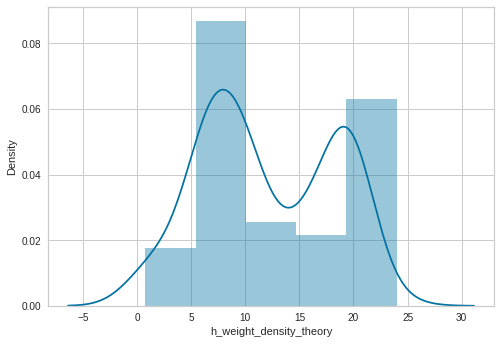

In [ ]:
# looking at the distribution of a relevant field 

data_nonull = pd.read_csv('https://datahub.hymarc.org/dataset/ad580d95-e7e2-4ef4-a7f6-3b2f91a96eba/resource/bbe2aafd-287a-485a-8776-6ebb239f72f9/download/hydstormatdb-chemicals.csv').dropna(subset=['h_weight_density_theory'])
sns.distplot(data_nonull['h_weight_density_theory'])

# Distribution is not normal, if we replace the missing values with mean, median or mode we can get biasing

print("Mean of var",data_nonull['h_weight_density_theory'].mean())
print("Median of var",data_nonull['h_weight_density_theory'].median())
print("Mode of var", data_nonull['h_weight_density_theory'].mode())

# We could find a different strongly correlated variable of which we could take statistics to 
# fill in the NaN values of this variable. However, I believe this different variable should be more
# complete in terms of available entries, and physically 'similar' I guess.. 


Distribution is not normal, if we replace the missing values with mean, median or mode we can get biasing. We could also find a different strongly correlated variable of which we could take statistics to fill in the NaN values of this variable. However, I believe this different variable should be more complete in terms of available entries, and physically 'similar' I guess.. 

## MICE imputation for missing values in all columns
it uses the whole dataset to perform replacement, so the latter should not affect strongly the dataset structure

In [ ]:
data_numeric_only = data[['h_weight_density_theory', 'h_weight_density_experiment','temperature_onset_release','temperature_full_release']].copy()
lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
data_numeric_only_imp_MICE=imp.fit_transform(data_numeric_only)
data_numeric_only_imp_MICE = pd.DataFrame(data_numeric_only_imp_MICE, columns = ['h_weight_density_theory','h_weight_density_experiment','temperature_onset_release','temperature_full_release']) 
data_numeric_only_imp_MICE

[IterativeImputer] Completing matrix with shape (155, 4)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.03
[IterativeImputer] Change: 191.48155325994932, scaled tolerance: 0.623 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.03
[IterativeImputer] Change: 9.286976350773443, scaled tolerance: 0.623 
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.04
[IterativeImputer] Change: 4.691312974742971, scaled tolerance: 0.623 
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.05
[IterativeImputer] Change: 2.4194782071041345, scaled tolerance: 0.623 
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.06
[IterativeImputer] Change: 1.247592333903924, scaled tolerance: 0.623 
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.08
[IterativeImputer] Change: 0.6435315083777482, scaled tolerance: 0.623 
[IterativeImputer] Ending imputation round 7/10, elapsed time 0.09
[IterativeImputer] Change: 0.3319849611257837

,h_weight_density_theory,h_weight_density_experiment,temperature_onset_release,temperature_full_release
0,16.900000,13.038865,367.414831,373.106150
1,0.850000,0.850000,298.000000,298.000000
2,0.850000,0.850000,298.000000,298.000000
3,1.300000,1.300000,298.000000,298.000000
4,5.600000,4.500000,354.903525,473.000000
...,...,...,...,...
150,6.200000,6.200000,298.000000,353.000000
151,6.200000,6.200000,298.000000,353.000000
152,3.000000,1.835837,373.000000,501.004325
153,9.500000,7.170515,348.840013,407.941460


In [ ]:
# Here I store only non numeric and non-NaN data
data_non_numeric_relevant = data[['chemical_formula']].copy()

#joining back
data_filled_MICE=pd.concat([data_non_numeric_relevant,data_numeric_only_imp_MICE],axis=1)
data_filled_MICE

,chemical_formula,h_weight_density_theory,h_weight_density_experiment,temperature_onset_release,temperature_full_release
0,NH3BH2NH2BH3,16.900000,13.038865,367.414831,373.106150
1,C15H16N2,0.850000,0.850000,298.000000,298.000000
2,C15H16N2,0.850000,0.850000,298.000000,298.000000
3,C9H12N2,1.300000,1.300000,298.000000,298.000000
4,CH2CHCH2NH2BH3,5.600000,4.500000,354.903525,473.000000
...,...,...,...,...,...
150,Na2B10H10/H2O/Rh,6.200000,6.200000,298.000000,353.000000
151,Na2B12H12/H2O/Rh,6.200000,6.200000,298.000000,353.000000
152,NaMeNHBH3,3.000000,1.835837,373.000000,501.004325
153,Ti(NH2BH3)4,9.500000,7.170515,348.840013,407.941460


In [ ]:
nan_count = data_filled_MICE.isna().sum()
print("Number of NaN entries \n", nan_count )
print("\n Number of unique entries \n",data_filled_MICE.nunique())

Number of NaN entries 
 chemical_formula               0
h_weight_density_theory        0
h_weight_density_experiment    0
temperature_onset_release      0
temperature_full_release       0
dtype: int64

 Number of unique entries 
 chemical_formula               113
h_weight_density_theory         54
h_weight_density_experiment     64
temperature_onset_release       43
temperature_full_release        41
dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



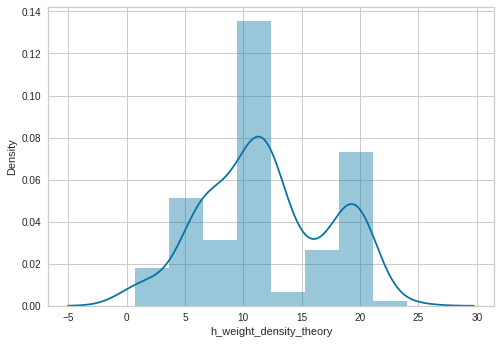

In [ ]:
sns.distplot(data_filled_MICE['h_weight_density_theory'])

# How the filled distribution looks like

##KNN imputation for missing values in all columns
it uses the whole dataset to perform replacement, so the latter should not affect strongly the dataset structure

In [ ]:
data_numeric_only = data[['h_weight_density_theory', 'h_weight_density_experiment','temperature_onset_release','temperature_full_release']].copy()
imputer = KNNImputer(n_neighbors=2, weights="uniform")
data_numeric_only_imp_KNN=imputer.fit_transform(data_numeric_only)
data_numeric_only_imp_KNN = pd.DataFrame(data_numeric_only_imp_KNN, columns = ['h_weight_density_theory','h_weight_density_experiment','temperature_onset_release','temperature_full_release']) 
data_numeric_only_imp_KNN

,h_weight_density_theory,h_weight_density_experiment,temperature_onset_release,temperature_full_release
0,16.900000,8.000000,323.000000,343.000000
1,0.850000,0.850000,298.000000,298.000000
2,0.850000,0.850000,298.000000,298.000000
3,1.300000,1.300000,298.000000,298.000000
4,5.600000,4.500000,341.000000,473.000000
...,...,...,...,...
150,6.200000,6.200000,298.000000,353.000000
151,6.200000,6.200000,298.000000,353.000000
152,3.000000,4.000000,373.000000,623.000000
153,9.500000,7.360000,370.500000,370.500000


In [ ]:
data_filled_KNN=pd.concat([data_non_numeric_relevant,data_numeric_only_imp_KNN],axis=1)
data_filled_KNN

,chemical_formula,h_weight_density_theory,h_weight_density_experiment,temperature_onset_release,temperature_full_release
0,NH3BH2NH2BH3,16.900000,8.000000,323.000000,343.000000
1,C15H16N2,0.850000,0.850000,298.000000,298.000000
2,C15H16N2,0.850000,0.850000,298.000000,298.000000
3,C9H12N2,1.300000,1.300000,298.000000,298.000000
4,CH2CHCH2NH2BH3,5.600000,4.500000,341.000000,473.000000
...,...,...,...,...,...
150,Na2B10H10/H2O/Rh,6.200000,6.200000,298.000000,353.000000
151,Na2B12H12/H2O/Rh,6.200000,6.200000,298.000000,353.000000
152,NaMeNHBH3,3.000000,4.000000,373.000000,623.000000
153,Ti(NH2BH3)4,9.500000,7.360000,370.500000,370.500000


In [ ]:
nan_count = data_filled_KNN.isna().sum()
print("Number of NaN entries \n", nan_count )
print("\n Number of unique entries \n",data_filled_KNN.nunique())

Number of NaN entries 
 chemical_formula               0
h_weight_density_theory        0
h_weight_density_experiment    0
temperature_onset_release      0
temperature_full_release       0
dtype: int64

 Number of unique entries 
 chemical_formula               113
h_weight_density_theory         51
h_weight_density_experiment     57
temperature_onset_release       33
temperature_full_release        24
dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



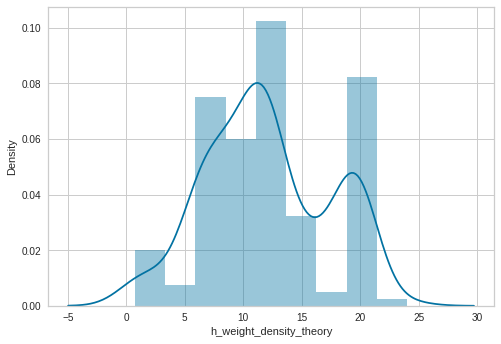

In [ ]:
sns.distplot(data_filled_KNN['h_weight_density_theory'])


I choose the KNN imputed dataset, since the distribution of the interesting variable is better populated 

## ANALYSIS of the filled dataset

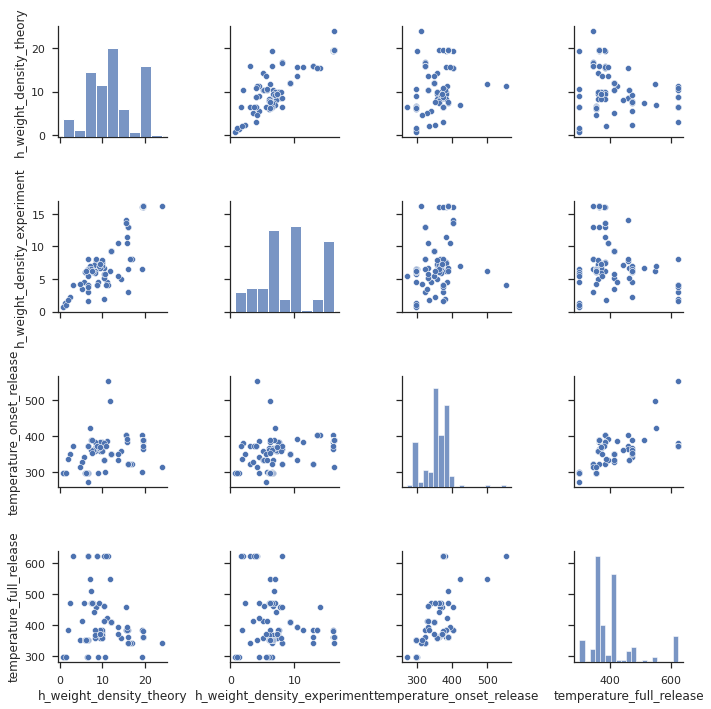

In [ ]:
sns.set(style="ticks", color_codes=True)

cols_to_plot = data_filled_KNN.columns[1:5].tolist()

sns.pairplot(data_filled_KNN[cols_to_plot])

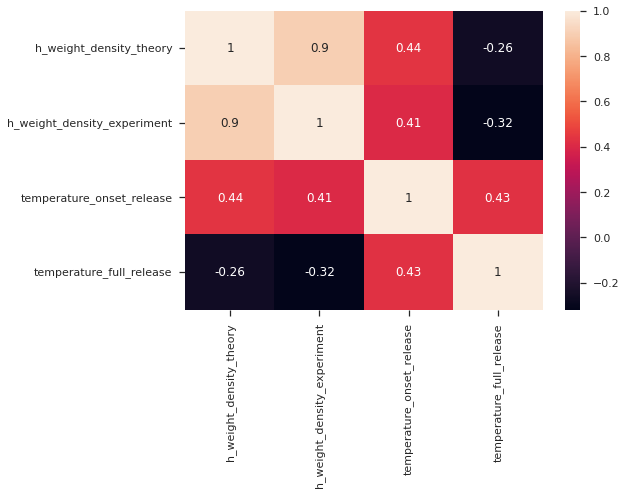

In [ ]:
corrMatrix = data_filled_KNN.corr()
# fig = px.imshow(corrMatrix, text_auto=".1f") #custom keys possible
# fig.update_layout(coloraxis_colorbar_x=0.72)
# plotly.offline.plot(fig, filename='/content/CorrelationMatrix.html')

sns.heatmap(corrMatrix, annot=True)

In [ ]:
X=data_filled_KNN.drop('chemical_formula',axis=1)

scaler = StandardScaler()
scaler.fit(X)

X_scal = scaler.transform(X)

### Unsupervised

#### KMeans clustering with no PCA

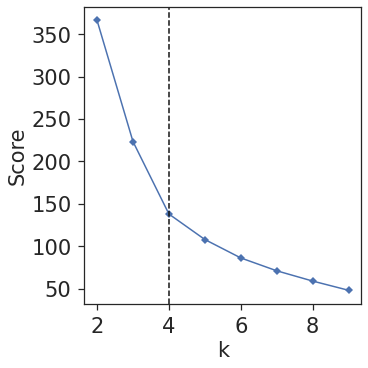

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5),nrows=1, ncols=1, constrained_layout=True)

model = KMeans(init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')

ax.set_xlabel('k', fontsize=21)
ax.set_ylabel('Score', fontsize=21)
# ax.set_title('Elbow', fontsize=21, y=1.0, pad=+14)
ax.tick_params(axis='both', which='major', labelsize=21)
# ax.tick_params(axis='both', which='minor', labelsize=30)
visualizer = KElbowVisualizer(model, k=(2,10), timings= False, ax=ax)
visualizer.fit(X_scal)        # Fit data to visualizer
        
# plt.subplots_adjust(bottom=0.1, right=1.0, top=0.9)

fig.show()

        chemical_formula  h_weight_density_theory  \
0           NH3BH2NH2BH3                16.900000   
1               C15H16N2                 0.850000   
2               C15H16N2                 0.850000   
3                C9H12N2                 1.300000   
4         CH2CHCH2NH2BH3                 5.600000   
..                   ...                      ...   
150     Na2B10H10/H2O/Rh                 6.200000   
151     Na2B12H12/H2O/Rh                 6.200000   
152            NaMeNHBH3                 3.000000   
153          Ti(NH2BH3)4                 9.500000   
154  [(C2H5)3NH]2 B12H12                12.005505   

     h_weight_density_experiment  temperature_onset_release  \
0                       8.000000                 323.000000   
1                       0.850000                 298.000000   
2                       0.850000                 298.000000   
3                       1.300000                 298.000000   
4                       4.500000                

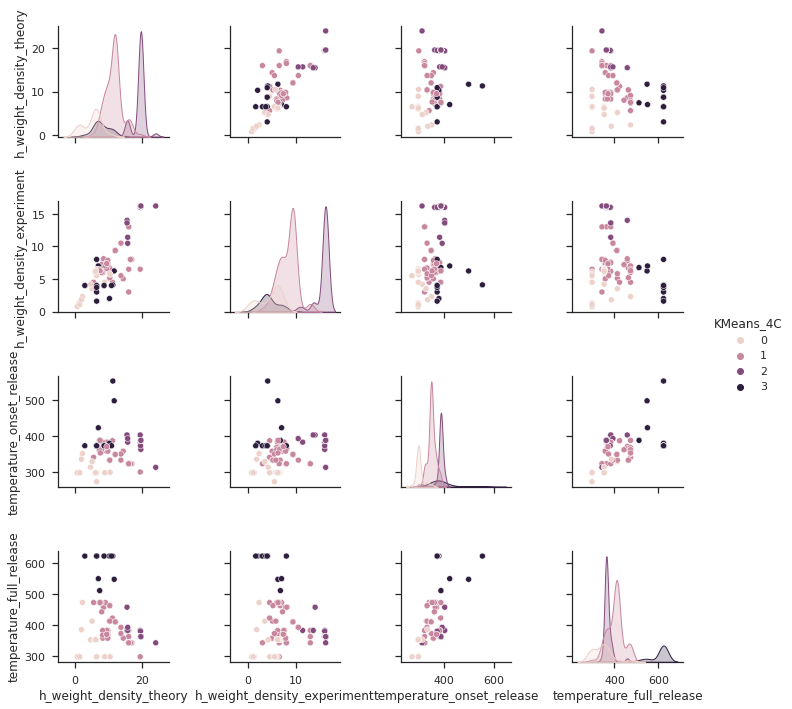

In [ ]:
k_means_4=KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto').fit(X_scal)
k_means_labels_4=k_means_4.labels_
pd_kmeans_outcome=pd.DataFrame.from_dict({'KMeans_4C': k_means_labels_4})

data_filled_KNN_1=pd.concat([data_filled_KNN,pd_kmeans_outcome],axis=1)

print(data_filled_KNN_1)

sns.set(style="ticks", color_codes=True)

cols_to_plot = data_filled_KNN_1.columns[1:5].tolist() + ["KMeans_4C"] 

sns.pairplot(data_filled_KNN_1[cols_to_plot],hue="KMeans_4C")

### Supervised 

### predicting cluster group ? 

#### SVM and grid search

In [ ]:
X_sup_1 = data_filled_KNN_1.drop(columns = 'KMeans_4C',axis=1)
X_sup_1 = X_sup_1.drop(columns = 'chemical_formula',axis=1)
Y_sup_1 = data_filled_KNN_1["KMeans_4C"]

X_train, X_test, Y_train, Y_test  = train_test_split(X_sup_1,Y_sup_1,test_size=0.2,random_state=25)

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)



(124, 4) (31, 4)
(124,) (31,)


In [ ]:
model_1 = SVC(kernel='linear')

model_1.fit(X_train,Y_train)

Y_pred_train = model_1.predict(X_train)

Score_1_train = accuracy_score(Y_pred_train,Y_train)
f1_score_1_train=f1_score(Y_pred_train, Y_train, average='weighted')

print("Prediction in training: accuracy and f1 scores ",Score_1_train,f1_score_1_train)

Y_pred_test = model_1.predict(X_test)

Score_1_test = accuracy_score(Y_pred_test,Y_test)
f1_score_1_test=f1_score(Y_pred_test,Y_test, average='weighted')
print("Prediction in test: accuracy and f1 scores ",Score_1_test,f1_score_1_test)

Prediction in training: accuracy and f1 scores  1.0 1.0
Prediction in test: accuracy and f1 scores  0.967741935483871 0.9685218007798652


In [ ]:
parameters={'C':[0.001,0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2, 5, 10.0]}

model_2 = GridSearchCV(SVC(kernel='linear'),parameters,cv=5)

model_2.fit(X_train,Y_train)

df=pd.DataFrame(model_2.cv_results_)

print(df)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.002321      0.000736         0.001355        0.000052   0.001   
1        0.002044      0.000149         0.001285        0.000012   0.002   
2        0.001941      0.000082         0.001299        0.000032   0.005   
3        0.001892      0.000054         0.001293        0.000032    0.01   
4        0.001989      0.000135         0.001294        0.000039    0.02   
5        0.002573      0.000425         0.001640        0.000309    0.05   
6        0.002039      0.000159         0.001266        0.000012     0.1   
7        0.002150      0.000173         0.001271        0.000009     0.2   
8        0.002296      0.000281         0.001400        0.000155     0.5   
9        0.002079      0.000153         0.001305        0.000074     1.0   
10       0.002077      0.000162         0.001265        0.000010       2   
11       0.002111      0.000204         0.001342        0.000111       5   
12       0.0

In [ ]:
best_model_2 = SVC(kernel='linear',C=0.01)
best_model_2.fit(X_train,Y_train)

Y_pred_train = best_model_2.predict(X_train)
Score_best_2_train = accuracy_score(Y_pred_train, Y_train)
f1_score_2_train=f1_score(Y_pred_train, Y_train, average='weighted')

Y_pred_test = best_model_2.predict(X_test)
Score_best_2_test = accuracy_score(Y_pred_test,Y_test)
f1_score_2_test=f1_score(Y_pred_test,Y_test, average='weighted')

print("Accuracy scores of train and test",Score_best_2_train,Score_best_2_test)
print("f1 scores of train and test",f1_score_2_train,f1_score_2_test)

Accuracy scores of train and test 1.0 0.967741935483871
f1 scores of train and test 1.0 0.9685218007798652


# TRIAL USING ALL THE THREE DATASETS TOGETHER

## no imputation - 62 true entries - Preliminary tasks

In [ ]:
chemicals = pd.read_csv('https://datahub.hymarc.org/dataset/ad580d95-e7e2-4ef4-a7f6-3b2f91a96eba/resource/bbe2aafd-287a-485a-8776-6ebb239f72f9/download/hydstormatdb-chemicals.csv')
adsorbants = pd.read_csv('https://datahub.hymarc.org/dataset/ad580d95-e7e2-4ef4-a7f6-3b2f91a96eba/resource/2d5233b8-5862-493e-9183-166bfe963ffe/download/hydstormatdb-adsorbents.csv')
reversible_hydrides = pd.read_csv('https://datahub.hymarc.org/dataset/ad580d95-e7e2-4ef4-a7f6-3b2f91a96eba/resource/4ef1c494-366e-43a3-bed4-a3985de5c374/download/hydstormatdb-reversible_hydrides.csv')
readme = pd.read_csv('https://datahub.hymarc.org/dataset/ad580d95-e7e2-4ef4-a7f6-3b2f91a96eba/resource/f42f5b95-2e63-4cfc-b091-b41e6d1ab851/download/readme.csv')

chem_ads=chemicals.merge(adsorbants,how='outer')
allmaterials = chem_ads.merge(reversible_hydrides,how='outer')
allmaterials.shape

(267, 31)

In [ ]:
#allmaterials

In [ ]:
dataset=allmaterials.filter(items=['material_type','chemical_formula','h_weight_density_theory','h_weight_density_experiment','temperature_onset_release','temperature_full_release'])
dataset=dataset[dataset.h_weight_density_theory.notnull()]
dataset=dataset[dataset.h_weight_density_experiment.notnull()]
dataset=dataset[dataset.temperature_onset_release.notnull()]
dataset=dataset[dataset.temperature_full_release.notnull()]
dataset = dataset.reset_index(drop=True)
material_type=dataset['material_type']
material_type=pd.get_dummies(material_type)

dataset=pd.concat([dataset,material_type],axis=1,ignore_index=False)
dataset


,material_type,chemical_formula,h_weight_density_theory,h_weight_density_experiment,temperature_onset_release,temperature_full_release,chemical,reversible hydride
0,chemical,C15H16N2,0.85,0.85,298.0,298.0,1,0
1,chemical,C15H16N2,0.85,0.85,298.0,298.0,1,0
2,chemical,C9H12N2,1.30,1.30,298.0,298.0,1,0
3,chemical,Al(NH2BH3)3,10.30,6.70,333.0,463.0,1,0
4,chemical,Al(NH2BH3)3+ionic liquid,10.30,5.10,333.0,413.0,1,0
...,...,...,...,...,...,...,...,...
57,reversible hydride,2LiBH4 + MgS,8.00,4.00,350.0,420.0,0,1
58,reversible hydride,4LiBH4 + 5Mg2NiH4,2.60,1.30,250.0,340.0,0,1
59,reversible hydride,Li2B12H12·7NH3,7.70,7.70,325.0,475.0,0,1
60,reversible hydride,Mg(AlH4) (BH4),11.30,7.45,473.0,623.0,0,1


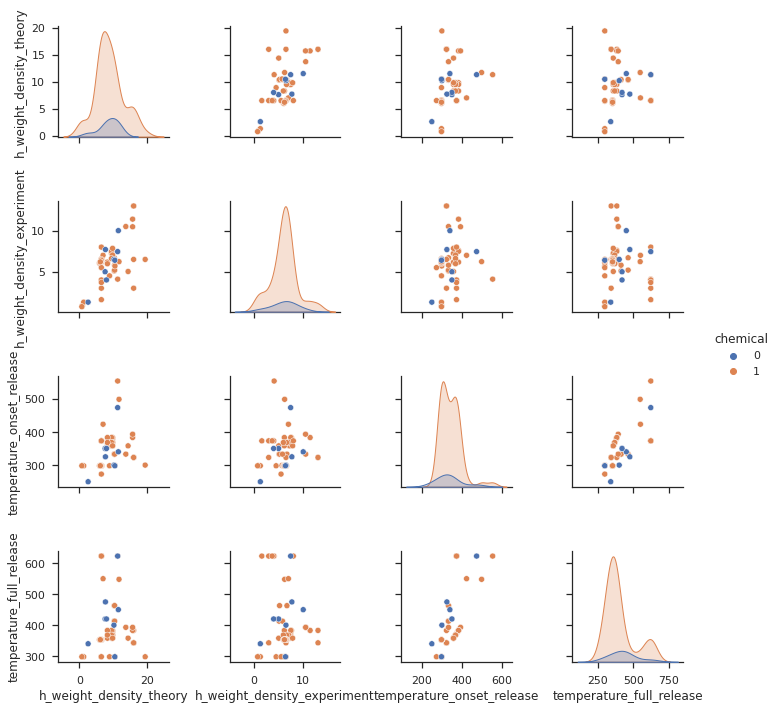

In [ ]:
sns.set(style="ticks", color_codes=True)

cols_to_plot = dataset.columns[2:6].tolist() + ['chemical']

sns.pairplot(dataset[cols_to_plot],hue='chemical')

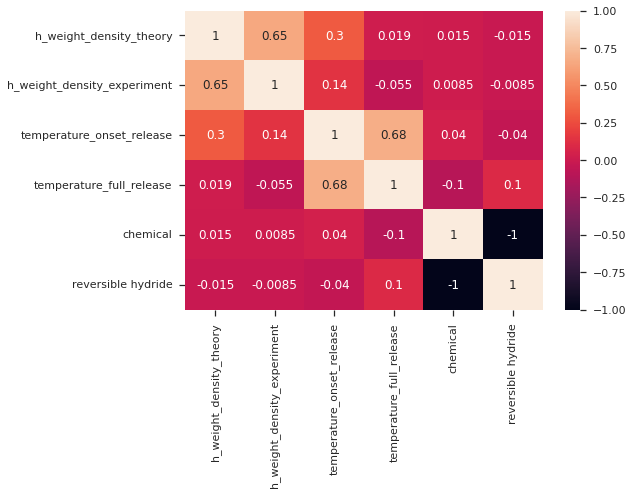

In [ ]:
corrMatrix = dataset.corr()
# fig = px.imshow(corrMatrix, text_auto=".1f") #custom keys possible
# fig.update_layout(coloraxis_colorbar_x=0.72)
# plotly.offline.plot(fig, filename='/content/CorrelationMatrix.html')

sns.heatmap(corrMatrix, annot=True)

In [ ]:
X=dataset.drop('chemical_formula',axis=1)
X=X.drop('material_type',axis=1)

scaler = StandardScaler()
scaler.fit(X)

X_scal = scaler.transform(X)

## Unsupervised 

#### K-Means clustering with no PCA

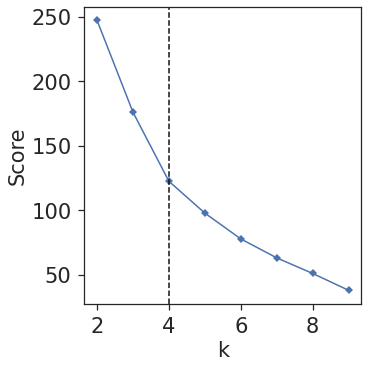

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5),nrows=1, ncols=1, constrained_layout=True)

model = KMeans(init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')

ax.set_xlabel('k', fontsize=21)
ax.set_ylabel('Score', fontsize=21)
# ax.set_title('Elbow', fontsize=21, y=1.0, pad=+14)
ax.tick_params(axis='both', which='major', labelsize=21)
# ax.tick_params(axis='both', which='minor', labelsize=30)
visualizer = KElbowVisualizer(model, k=(2,10), timings= False, ax=ax)
visualizer.fit(X_scal)        # Fit data to visualizer
        
# plt.subplots_adjust(bottom=0.1, right=1.0, top=0.9)

fig.show()

In [ ]:
k_means_4=KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto').fit(X_scal)
k_means_labels_4=k_means_4.labels_
pd_kmeans_outcome=pd.DataFrame.from_dict({'KMeans_4C': k_means_labels_4})
dataset_1=pd.concat([dataset,pd_kmeans_outcome],axis=1,ignore_index=False)
dataset_1

,material_type,chemical_formula,h_weight_density_theory,h_weight_density_experiment,temperature_onset_release,temperature_full_release,chemical,reversible hydride,KMeans_4C
0,chemical,C15H16N2,0.85,0.85,298.0,298.0,1,0,3
1,chemical,C15H16N2,0.85,0.85,298.0,298.0,1,0,3
2,chemical,C9H12N2,1.30,1.30,298.0,298.0,1,0,3
3,chemical,Al(NH2BH3)3,10.30,6.70,333.0,463.0,1,0,2
4,chemical,Al(NH2BH3)3+ionic liquid,10.30,5.10,333.0,413.0,1,0,2
...,...,...,...,...,...,...,...,...,...
57,reversible hydride,2LiBH4 + MgS,8.00,4.00,350.0,420.0,0,1,0
58,reversible hydride,4LiBH4 + 5Mg2NiH4,2.60,1.30,250.0,340.0,0,1,0
59,reversible hydride,Li2B12H12·7NH3,7.70,7.70,325.0,475.0,0,1,0
60,reversible hydride,Mg(AlH4) (BH4),11.30,7.45,473.0,623.0,0,1,0


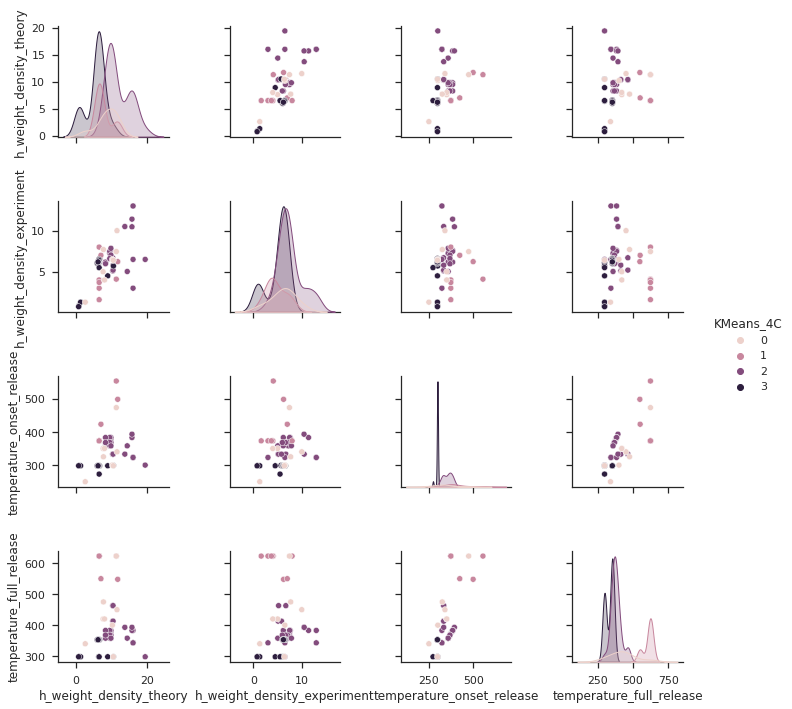

In [ ]:
sns.set(style="ticks", color_codes=True)

cols_to_plot = dataset_1.columns[2:6].tolist() + ["KMeans_4C"] 

sns.pairplot(dataset_1[cols_to_plot],hue="KMeans_4C")

## Supervised 

#### predicting cluster group ? 

##### SVM and grid search

In [ ]:
X_sup_1 = dataset_1.drop(columns = 'KMeans_4C',axis=1)
X_sup_1 = X_sup_1.drop(columns = 'chemical_formula',axis=1)
X_sup_1 = X_sup_1.drop(columns = 'material_type',axis=1)
Y_sup_1 = dataset_1["KMeans_4C"]

X_train, X_test, Y_train, Y_test  = train_test_split(X_sup_1,Y_sup_1,test_size=0.2,random_state=25)

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)



(49, 6) (13, 6)
(49,) (13,)


In [ ]:
model_1 = SVC(kernel='linear')

model_1.fit(X_train,Y_train)

Y_pred_train = model_1.predict(X_train)

Score_1_train = accuracy_score(Y_pred_train,Y_train)
f1_score_1_train=f1_score(Y_pred_train, Y_train, average='weighted')
print("Prediction in training: accuracy and f1 scores ",Score_1_train,f1_score_1_train)

Y_pred_test = model_1.predict(X_test)

Score_1_test = accuracy_score(Y_pred_test,Y_test)
f1_score_1_test=f1_score(Y_pred_test,Y_test, average='weighted')
print("Prediction in test: accuracy and f1 scores ",Score_1_test,f1_score_1_test)

Prediction in training: accuracy and f1 scores  1.0 1.0
Prediction in test: accuracy and f1 scores  1.0 1.0


In [ ]:
parameters={'C':[0.001,0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2, 5, 10.0]}

model_2 = GridSearchCV(SVC(kernel='linear'),parameters,cv=5)

model_2.fit(X_train,Y_train)

df=pd.DataFrame(model_2.cv_results_)

print(df)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.002282      0.000723         0.001391        0.000042   0.001   
1        0.001990      0.000143         0.001410        0.000078   0.002   
2        0.002239      0.000533         0.001672        0.000345   0.005   
3        0.002617      0.000497         0.001724        0.000384    0.01   
4        0.002401      0.000251         0.001488        0.000208    0.02   
5        0.002801      0.000792         0.001391        0.000086    0.05   
6        0.004498      0.001820         0.001386        0.000035     0.1   
7        0.007044      0.003729         0.001402        0.000077     0.2   
8        0.108202      0.119564         0.001703        0.000238     0.5   
9        0.100390      0.127253         0.001677        0.000336     1.0   
10       0.097996      0.120225         0.001671        0.000185       2   
11       0.101721      0.125472         0.001745        0.000386       5   
12       0.0

In [ ]:
best_model_2 = SVC(kernel='linear',C=0.01)
best_model_2.fit(X_train,Y_train)

Y_pred_train = best_model_2.predict(X_train)
Score_best_2_train = accuracy_score(Y_pred_train, Y_train)
f1_score_best_2_train=f1_score(Y_pred_train, Y_train, average='weighted')

Y_pred_test = best_model_2.predict(X_test)
Score_best_2_test = accuracy_score(Y_pred_test,Y_test)
f1_score_best_2_test=f1_score(Y_pred_test,Y_test, average='weighted')

print("Accuracy scores of train and test",Score_best_2_train,Score_best_2_test)
print("f1 scores of train and test",f1_score_best_2_train,f1_score_best_2_test)

Accuracy scores of train and test 0.8775510204081632 0.8461538461538461
f1 scores of train and test 0.8728825068110782 0.8076923076923077
